# Problem Statement

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

# Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:


1.   Facilitate the process of visa approvals.
2.  Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.




# Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.


* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
employee=pd.read_csv("/content/drive/MyDrive/Great Learning AIML course/3rd Month Advanced Machine Learning/Project 3: Advanced Machine Learning: EasyVisa/EasyVisa.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
data=employee.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
data.shape

(25480, 12)

* There are 25480 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
data.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Lets convert the columns with an 'object' datatype into categorical variables**

In [ ]:
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data.requires_job_training.value_counts())
print(data.region_of_employment.value_counts())
print(data.unit_of_wage.value_counts())
print(data.full_time_position.value_counts())
print(data.case_status.value_counts())



continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


In [ ]:
def eda_analysis(data, numeric_columns, categorical_columns, target=None):
    # Univariate Analysis
    for col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    for col in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

    # Bivariate Analysis: target variable must be numeric
    if target:
        for col in categorical_columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=col, y=target, data=data)
            plt.title(f'{target} by {col}')
            plt.xlabel(col)
            plt.ylabel(target)
            plt.show()

        for col in numeric_columns:
            if col != target:
                plt.figure(figsize=(8, 5))
                sns.scatterplot(x=col, y=target, data=data)
                plt.title(f'{target} vs {col}')
                plt.xlabel(col)
                plt.ylabel(target)
                plt.show()

        # Correlation heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(data[numeric_columns + [target]].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

In [ ]:
# The code first converts all wages to yearly figures by multiplying prevailing_wage with appropriate conversion factors based on the unit_of_wage.
# It then replaces categorical string values in multiple columns with corresponding integers to make the data numerical and model-ready.

conversion_factors_raw = {
    'Hour': 2080,      # 40 hours/week * 52 weeks
    'Week': 52,        # 52 weeks/year
    'Bi-Weekly': 26,   # 26 bi-weekly periods/year
    'Month': 12,       # 12 months/year
    'Year': 1          # Already yearly
}

# Step 1: Convert wages to yearly figures before replacing or dropping anything
data['wage_yearly'] = data['prevailing_wage'] * data['unit_of_wage'].map(conversion_factors_raw)

# Step 2: Replace string categories with integers
replaceStruct = {
    "continent": {"Asia": 1, "Europe": 2, "North America": 3, "South America": 4, "Africa": 5, "Oceania": 6},
    "education_of_employee": {"High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4},
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "region_of_employment": {"Northeast": 1, "South": 2, "West": 3, "Midwest": 4, "Island": 5},
    "unit_of_wage": {"Year": 1, "Month": 2, "Week": 3, "Hour": 4},
    "full_time_position": {"N": 0, "Y": 1},
    "case_status": {"Denied": 0, "Certified": 1}
}

data = data.replace(replaceStruct)

# Step 3: Drop the now-unnecessary columns
data.drop(columns=['prevailing_wage', 'unit_of_wage'], inplace=True)


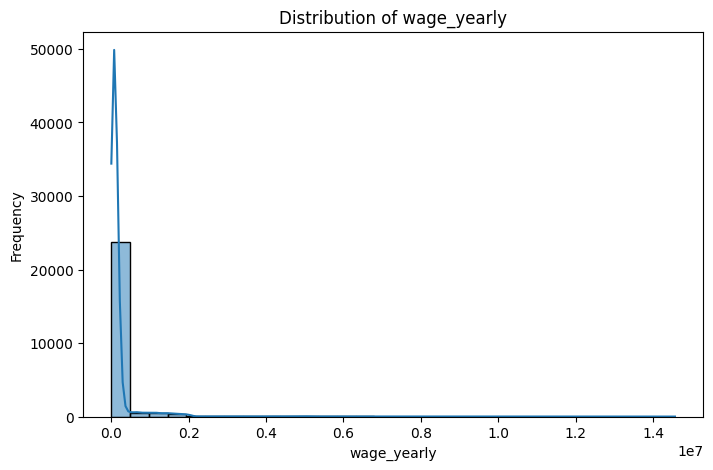

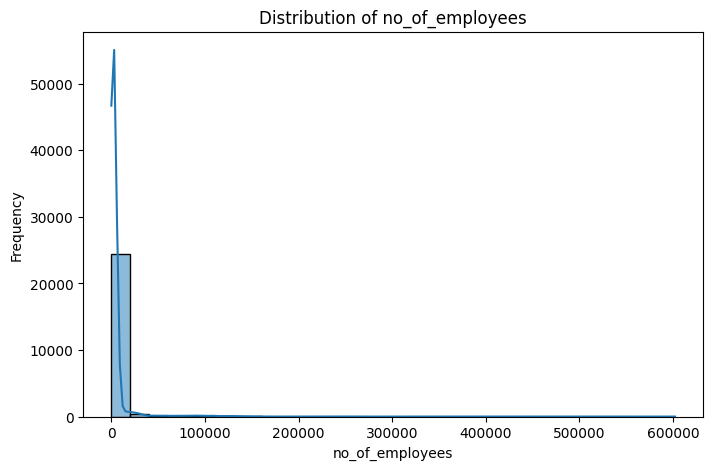

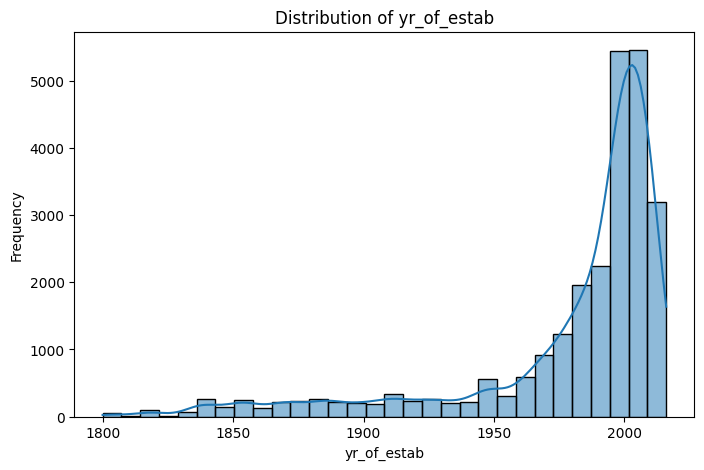

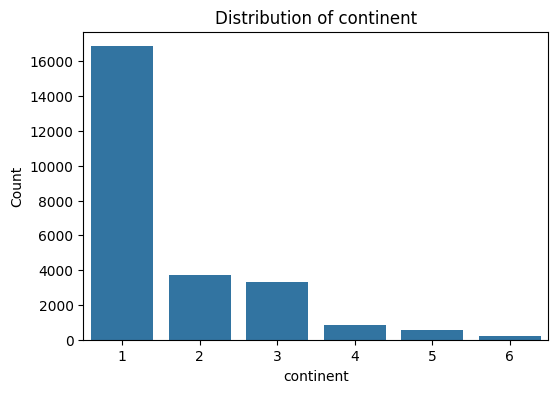

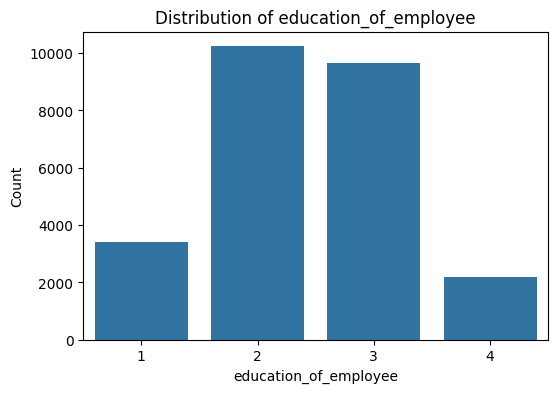

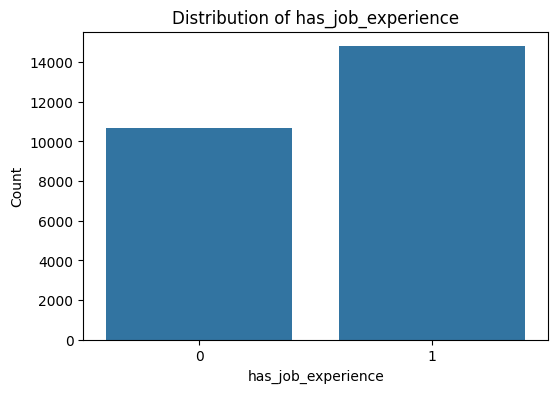

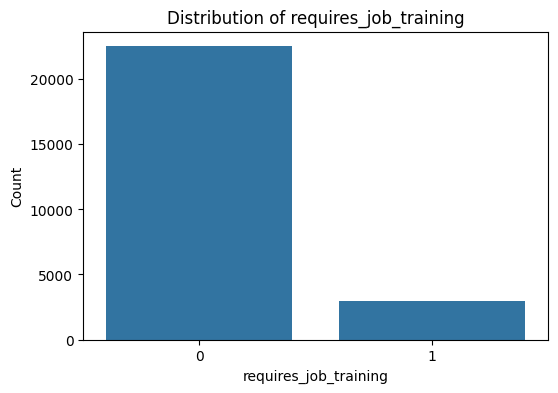

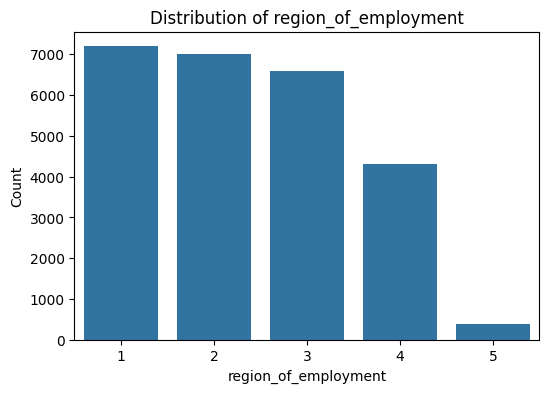

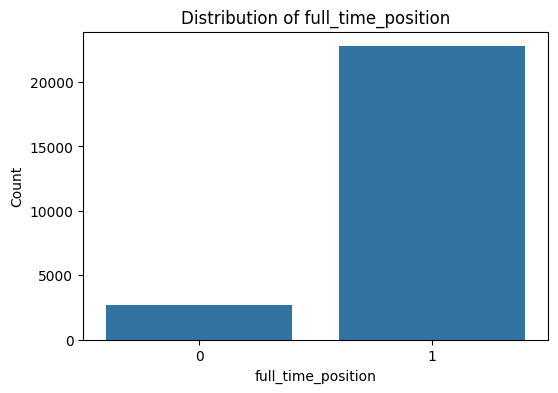

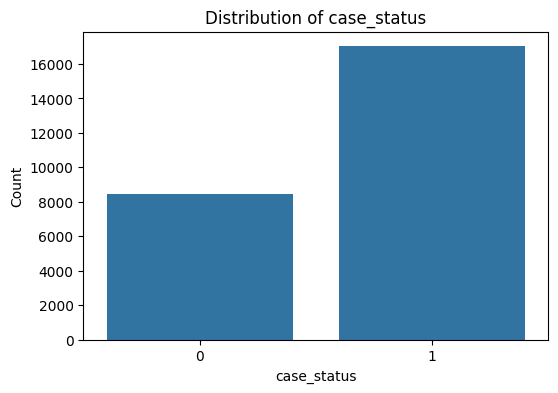

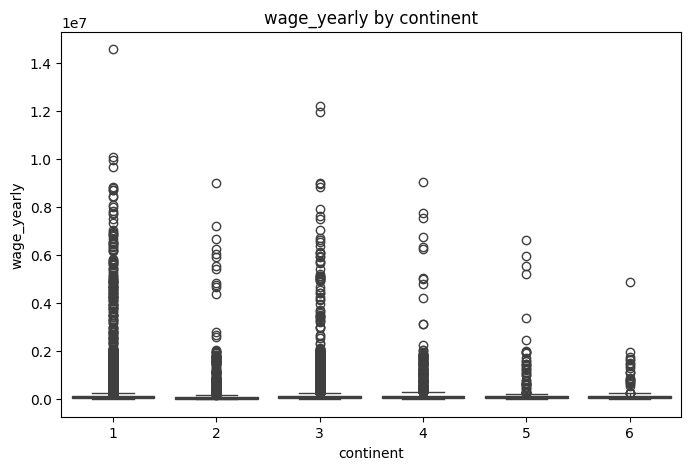

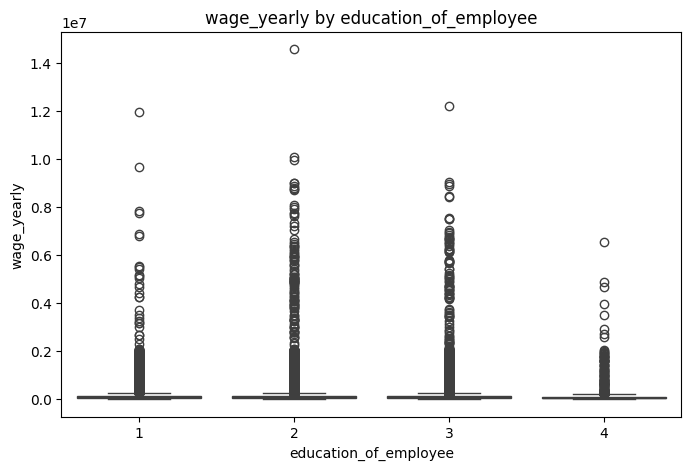

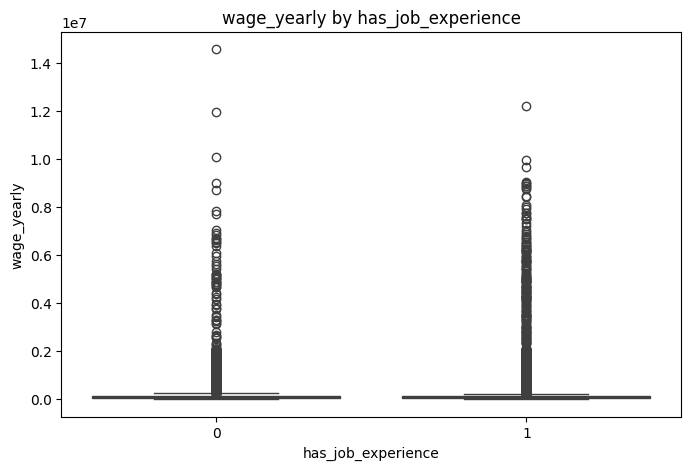

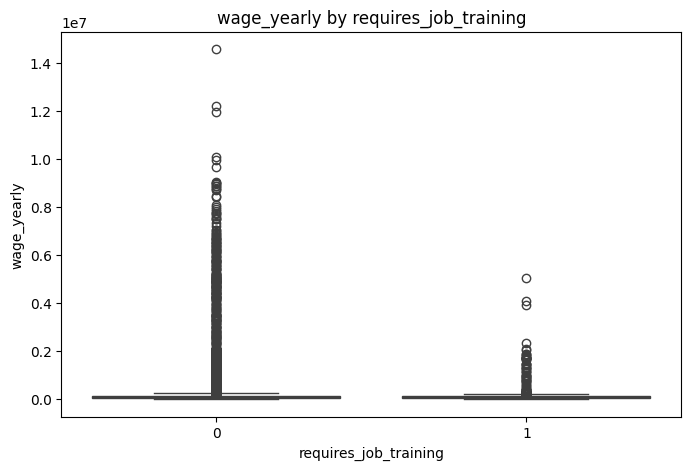

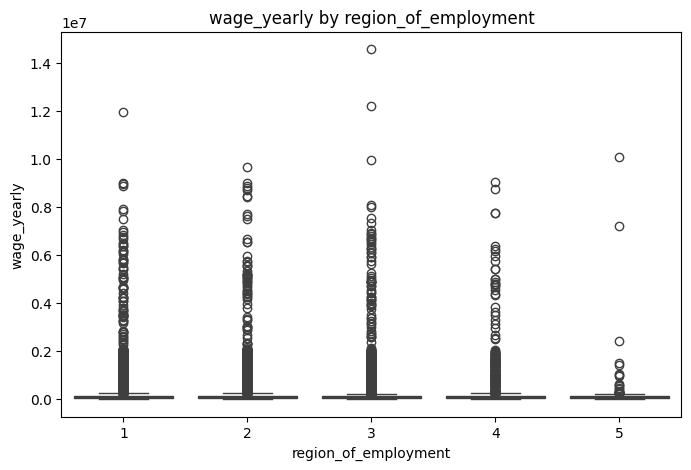

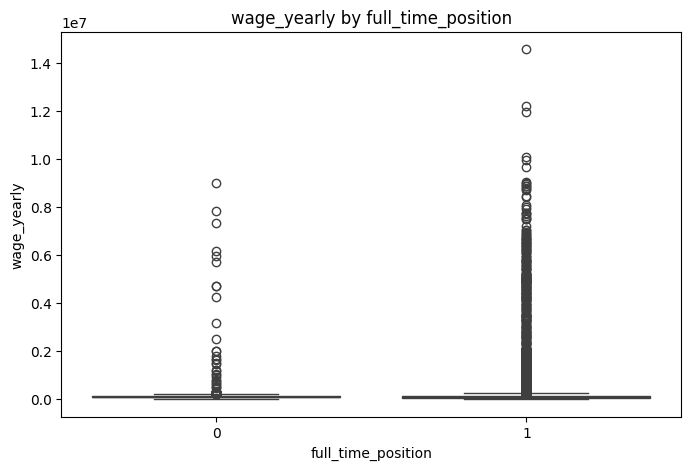

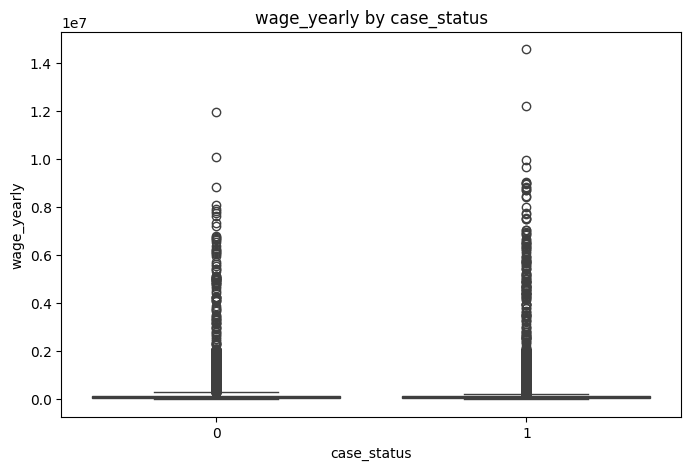

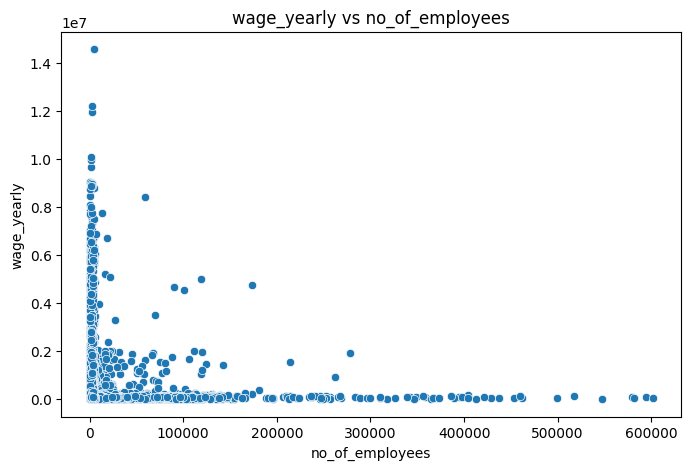

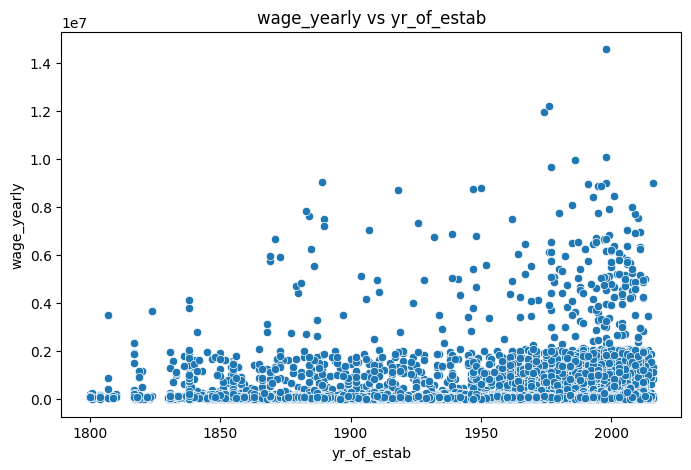

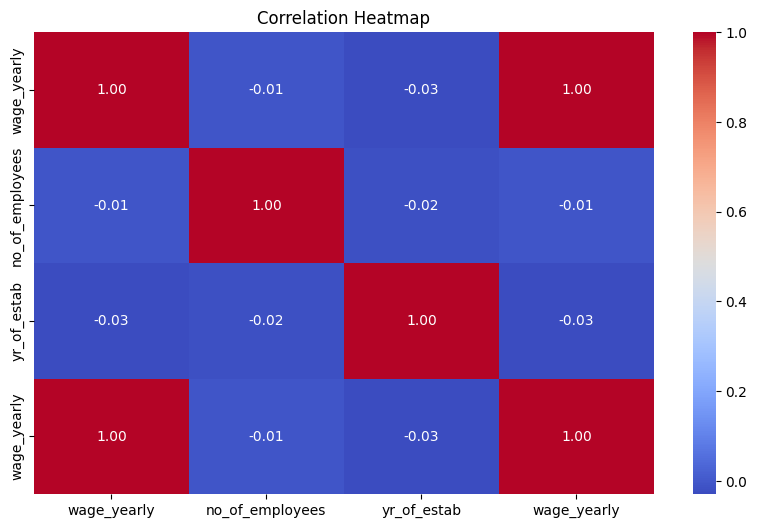

In [ ]:
numeric_cols = ['wage_yearly', 'no_of_employees', 'yr_of_estab']
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment',
                    'full_time_position', 'case_status']

eda_analysis(data, numeric_cols, categorical_cols, target='wage_yearly')

Data analysis reveals that most organizations have a small number of employees, with a few outliers having extremely high counts, resulting in a right-skewed distribution. The majority of companies were established after 1950, peaking around the early 2000s. In terms of geographical distribution, most organizations are located in continent Asia, with decreasing representation across continents Europe to Oceania. Employees predominantly fall into education levels Bachelor's and Master's, and a larger proportion have prior job experience. Employment is concentrated in regions Europe to North America, while region Africa has minimal representation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  int64  
 2   education_of_employee  25480 non-null  int64  
 3   has_job_experience     25480 non-null  int64  
 4   requires_job_training  25480 non-null  int64  
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  int64  
 8   full_time_position     25480 non-null  int64  
 9   case_status            25480 non-null  int64  
 10  wage_yearly            25480 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 2.1+ MB


Now the dataset consists of 25,480 entries and 10 columns, all of which have complete data with no missing values. It includes 9 integer columns and 1 float column, covering categorical and numerical features like employee education, experience, wages, and organizational details.

### Summary of the dataset.

In [ ]:
data.drop('case_id',axis=1,inplace=True)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,full_time_position,case_status,wage_yearly
0,1,1,0,0,14513,2007,3,1,0,1231782.032
1,1,3,1,0,2412,2002,1,1,1,83425.650
2,1,2,0,1,44444,2008,3,1,0,122996.860
3,1,2,0,0,98,1897,3,1,0,83434.030
4,5,3,1,0,1082,2005,2,1,1,149907.390


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
continent,25480.0,1.629356,1.050020,1.0,1.000,1.00,2.000,6.0
education_of_employee,25480.0,2.415934,0.826718,1.0,2.000,2.00,3.000,4.0
has_job_experience,25480.0,0.580926,0.493417,0.0,0.000,1.00,1.000,1.0
requires_job_training,25480.0,0.115973,0.320199,0.0,0.000,0.00,0.000,1.0
no_of_employees,25480.0,5667.043210,22877.928848,-26.0,1022.000,2109.00,3504.000,602069.0
yr_of_estab,25480.0,1979.409929,42.366929,1800.0,1976.000,1997.00,2005.000,2016.0
region_of_employment,25480.0,2.358320,1.105036,1.0,1.000,2.00,3.000,5.0
full_time_position,25480.0,0.893760,0.308151,0.0,1.000,1.00,1.000,1.0
case_status,25480.0,0.667896,0.470977,0.0,0.000,1.00,1.000,1.0
wage_yearly,25480.0,197391.155259,578591.666314,100.0,47107.965,82839.46,124825.035,14569149.4


In [ ]:
X = data.drop("case_status" , axis=1)
y = data.pop("case_status")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

# **AdaBoost Classifier**

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7366001345593183
Accuracy on test set :  0.7306384092098378
Recall on training set :  0.8869302442709645
Recall on test set :  0.882664054848188
Precision on training set :  0.7592153481353741
Precision on test set :  0.7552799195440831


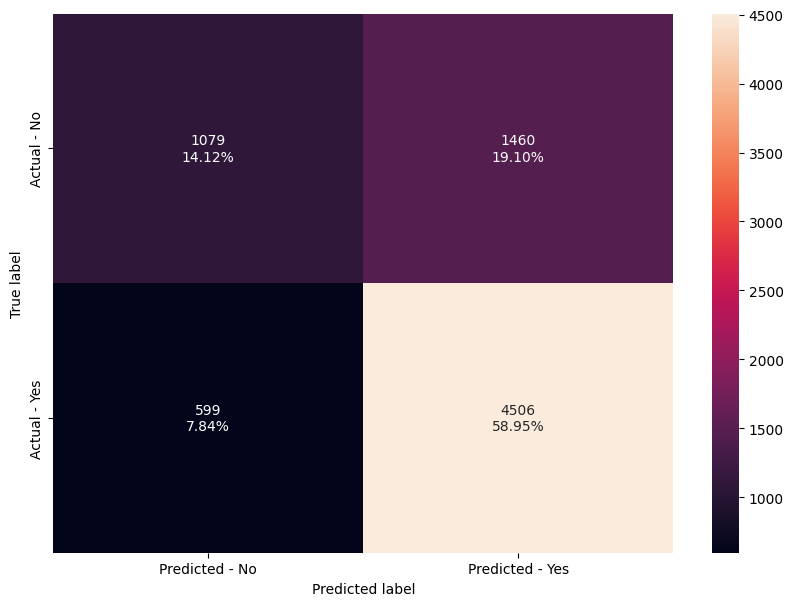

In [ ]:
make_confusion_matrix(abc,y_test)

# **Gradient Boosting Classifier**

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7522987216864768
Accuracy on test set :  0.739534275248561
Recall on training set :  0.8894485016368673
Recall on test set :  0.8857982370225269
Precision on training set :  0.7736000584069505
Precision on test set :  0.7625632377740303


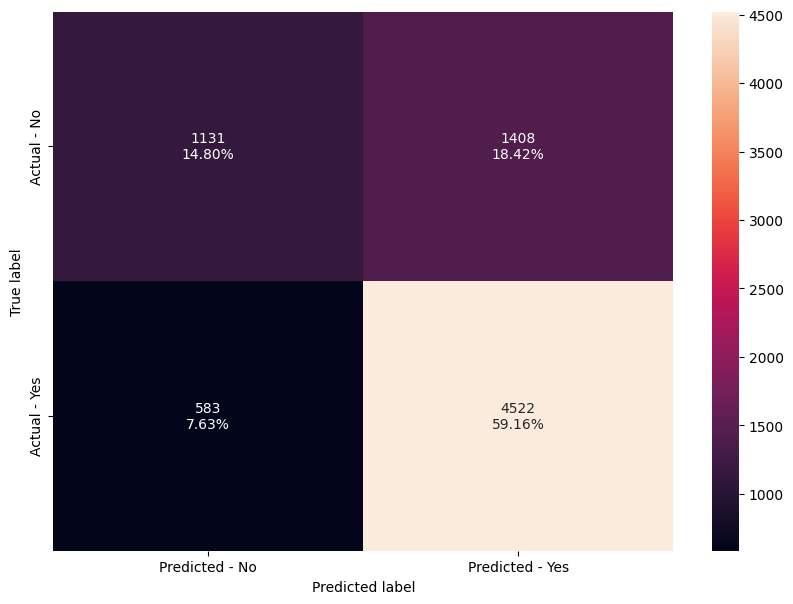

In [ ]:
make_confusion_matrix(gbc,y_test)

# Hyperparameter Tuning

# **AdaBoost Classifier**

In [ ]:
# Define base estimator with those hyperparameters
base_estimator = DecisionTreeClassifier(
    class_weight="balanced",
    max_features=0.3,
    max_leaf_nodes=None,  # you may use this instead of max_depth
    min_samples_leaf=4,
    max_depth=10
)

# Define AdaBoost classifier with the base estimator
ada_whyperp1_tuned = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=150
)

# Fit to training data
ada_whyperp1_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    max_features=0.3,
                                                    min_samples_leaf=4),
                   n_estimators=150)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(ada_whyperp1_tuned)

Accuracy on training set :  0.7489908051132541
Accuracy on test set :  0.6764782836211408
Recall on training set :  0.7439771677998824
Recall on test set :  0.6963761018609207
Precision on training set :  0.8613216715257531
Precision on test set :  0.7938811969629299


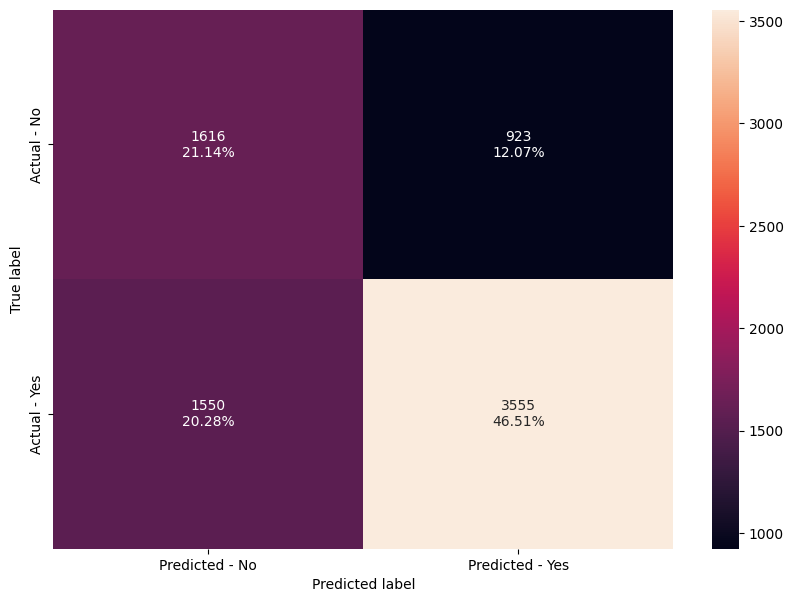

In [ ]:
make_confusion_matrix(ada_whyperp1_tuned,y_test)

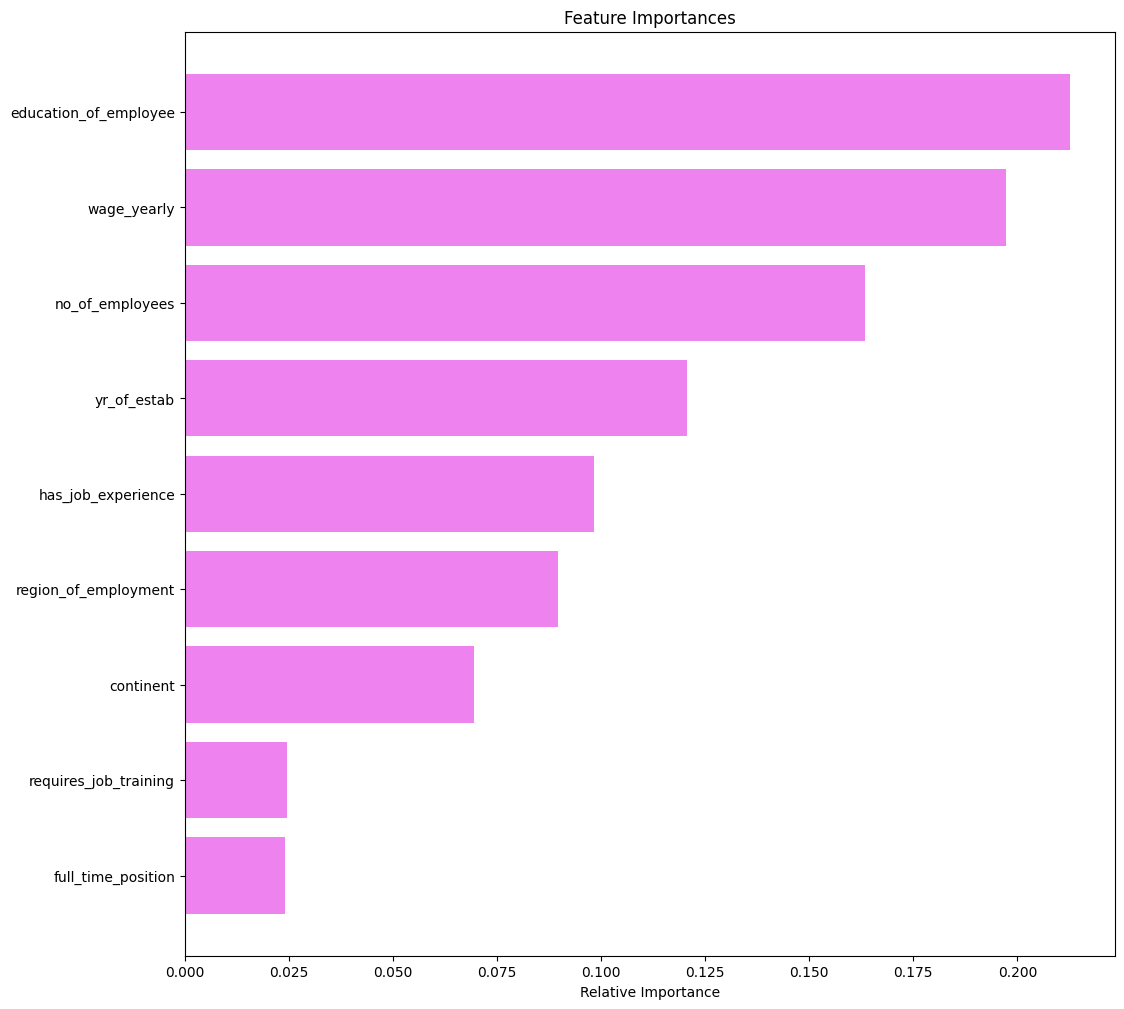

In [ ]:
importances = ada_whyperp1_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Gradient Boosting Classifier**

In [ ]:
gbc_whyperp1_tuned = GradientBoostingClassifier(
    n_estimators=150,
    max_features=0.3,
    min_samples_leaf=4,
    max_depth=10
)

gbc_whyperp1_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.3, min_samples_leaf=4,
                           n_estimators=150)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(gbc_whyperp1_tuned)

Accuracy on training set :  0.9241421843462659
Accuracy on test set :  0.7192569335426479
Recall on training set :  0.976580206497104
Recall on test set :  0.8438785504407443
Precision on training set :  0.9154863078375827
Precision on test set :  0.7615343821813683


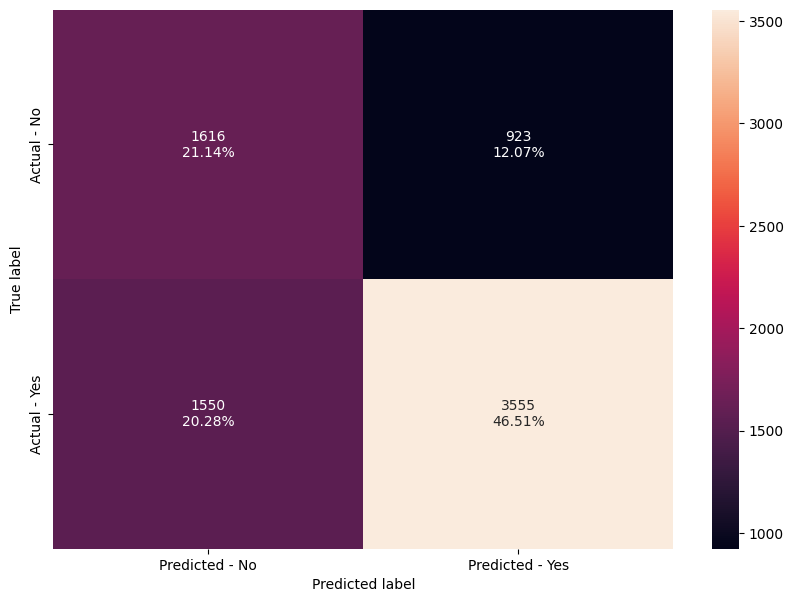

In [ ]:
make_confusion_matrix(ada_whyperp1_tuned,y_test)

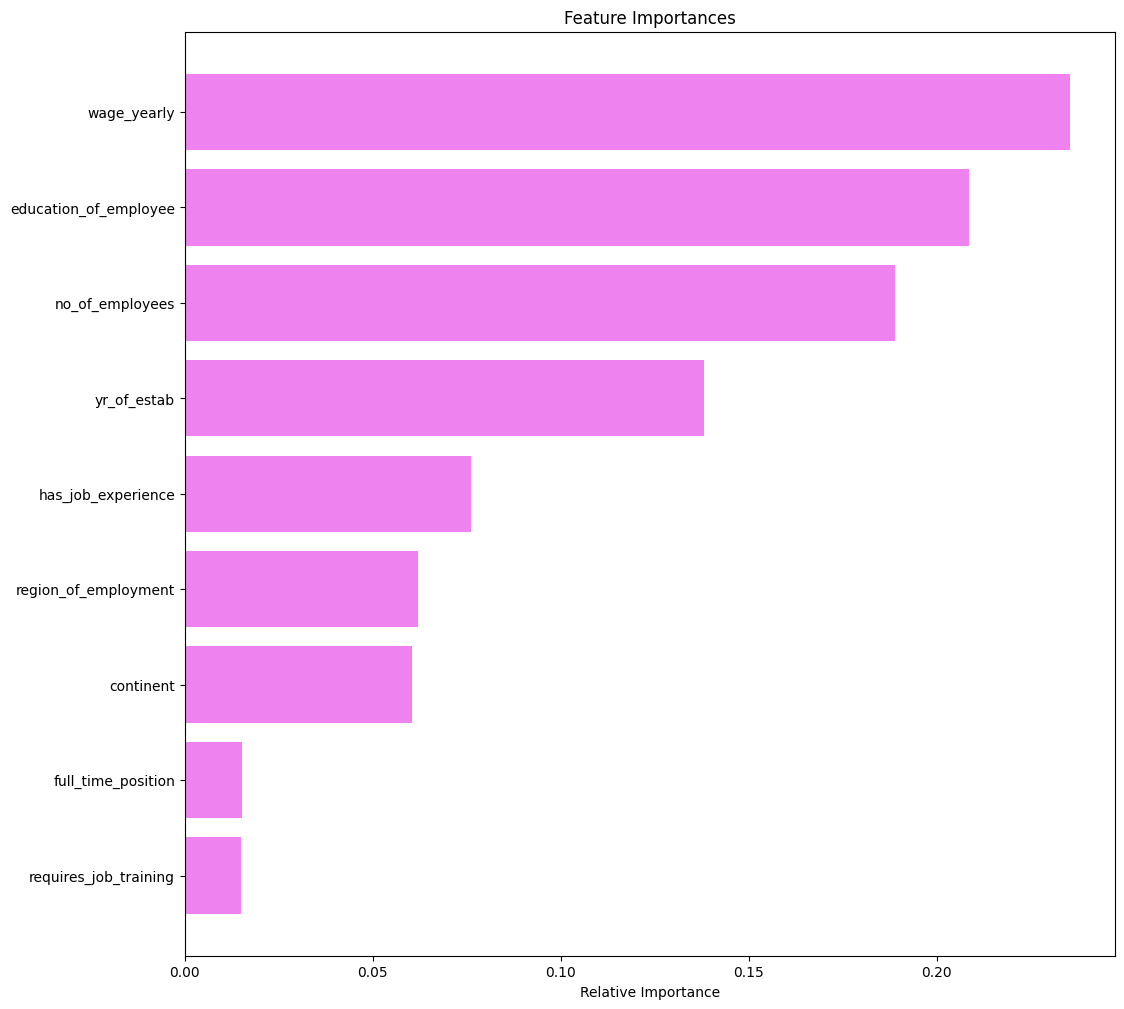

In [ ]:
importances = gbc_whyperp1_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing all models

In [ ]:
# defining list of models
models = [abc,gbc,ada_whyperp1_tuned,gbc_whyperp1_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost','Gradient Boosting','AdaBoost Tuned',
                                          'Gradient Boosting Tuned',],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost,0.74,0.73,0.89,0.88,0.76,0.76
1,Gradient Boosting,0.75,0.74,0.89,0.89,0.77,0.76
2,AdaBoost Tuned,0.75,0.68,0.74,0.70,0.86,0.79
3,Gradient Boosting Tuned,0.92,0.72,0.98,0.84,0.92,0.76


The performance table compares four machine learning models—AdaBoost, Gradient Boosting, and their tuned versions—based on key metrics like accuracy, recall, and precision for both training and test datasets. Below is a detailed summary:


*   AdaBoost (Untuned) shows consistent performance with 74% training accuracy and 73% test accuracy. Its recall is high (0.89 train, 0.88 test), indicating it captures most of the positive class, and it maintains good balance in precision (0.76). This suggests reliable generalization.
*   Gradient Boosting (Untuned) performs slightly better, with 75% training and 74% test accuracy. Its recall (0.89 both on train and test) and precision (0.77 train, 0.76 test) also remain strong and balanced, making it a robust and well-generalizing model.


*   AdaBoost Tuned shows higher training precision (0.86) and accuracy (0.75), but its test accuracy drops to 68%. Recall also decreases, indicating potential overfitting—the model fits the training data well but struggles to generalize.
*  Gradient Boosting Tuned delivers very high training metrics (92% accuracy, 98% recall), but test accuracy falls to 72% and test recall to 84%, again indicating overfitting. While it learns training data exceptionally well, its performance on new data diminishes.


**In summary**, while tuning improves training performance, it often leads to overfitting. Untuned Gradient Boosting provides the best balance across all metrics, offering strong performance with good generalization.